<a href="https://colab.research.google.com/github/hongnhan217/AI_Class/blob/main/use_flower_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
import numpy as np
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array

In [2]:
photos = np.load('/content/drive/MyDrive/pic_train/five_flower_photos.npy')
labels = np.load('/content/drive/MyDrive/pic_train/five_flower_labels.npy')

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.2)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(720, 150, 150, 3) (180, 150, 150, 3)
(720,) (180,)


In [23]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [25]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,6)
y_test = to_categorical(y_test,6)

print(y_train.shape,y_test.shape)

(720, 6) (180, 6)


In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
])

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(6,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [27]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
model.fit(x_train,y_train,epochs=20,batch_size=64,verbose=1)

Epoch 1/20
12/12 [==============================] - 1s 46ms/step - loss: 2.1412 - accuracy: 0.2542
Epoch 2/20
12/12 [==============================] - 0s 41ms/step - loss: 1.2070 - accuracy: 0.5083
Epoch 3/20
12/12 [==============================] - 0s 41ms/step - loss: 0.8878 - accuracy: 0.6375
Epoch 4/20
12/12 [==============================] - 0s 41ms/step - loss: 0.8560 - accuracy: 0.6556
Epoch 5/20
12/12 [==============================] - 0s 40ms/step - loss: 0.6962 - accuracy: 0.7264
Epoch 6/20
12/12 [==============================] - 0s 41ms/step - loss: 0.5488 - accuracy: 0.7806
Epoch 7/20
12/12 [==============================] - 0s 41ms/step - loss: 0.4817 - accuracy: 0.8208
Epoch 8/20
12/12 [==============================] - 0s 40ms/step - loss: 0.4474 - accuracy: 0.8375
Epoch 9/20
12/12 [==============================] - 0s 40ms/step - loss: 0.3302 - accuracy: 0.8792
Epoch 10/20
12/12 [==============================] - 1s 42ms/step - loss: 0.2031 - accuracy: 0.9347
Epoch 11/

In [28]:
from keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/flower.h5')

In [29]:
model1 = load_model('/content/drive/MyDrive/Colab Notebooks/flower.h5')

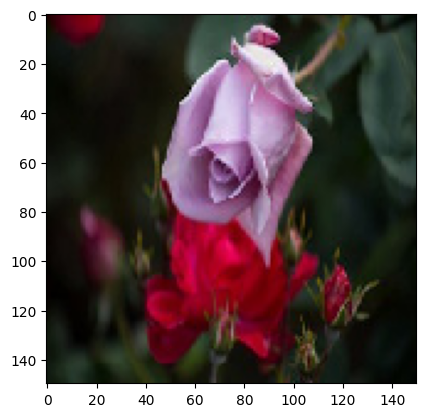

so: [0. 0. 0. 0. 0. 1.]


In [30]:
digit = x_test[30]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print("so:",y_test[30])

In [32]:
classes = ['none','tulip', 'sunflower', 'lotus', 'daisy', 'rose']
img = x_test[30]
img = np.expand_dims(img, axis=0)
res = model1.predict(img)
print("predict: ",classes[np.argmax(res[0])],(res[0]))

1/1 [==============================] - 0s 20ms/step
predict:  rose [1.9206774e-14 1.9727313e-06 1.3517091e-07 2.9315856e-09 1.1469747e-09
 9.9999785e-01]
